# Census Income Prediction
The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Total number of records
n_records = df.shape[0]

# Total number of features
n_features = df.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['Income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


# Data Cleaning

In [6]:
# drop column not required - education is being dropped because it was duplicate of education_num.
df.drop('Education', inplace=True, axis=1)

The matching education level of the education_num:
1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad, 10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [7]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [8]:
# check for nulls
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset, that makes the dataset good for analysis

In [9]:
# check duplicates and remove it
df.duplicated().sum()

24

The dataset has 24 duplicate rows.
These rows need to be removed

In [10]:
df = df[~df.duplicated()]

In [11]:
df.duplicated().sum()

0

Duplicated rows removed, now zero

In [12]:
#checking categorical columns and their contents
df.describe(include='O')

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,7,15,6,5,2,42,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,14970,4136,13187,27794,21774,29152,24697


In [13]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()

In [14]:
#Checking each categorical columns 
df.	Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [15]:
#Checking each categorical columns 
df.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

In [16]:
#Checking each categorical columns 
df.Marital_status.value_counts()

Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [17]:
#Checking each categorical columns 
df.Occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: Occupation, dtype: int64

#Checking each categorical columns 
df.	Workclass.value_counts()

In [18]:
#Checking each categorical columns 
df.Relationship.value_counts()

Husband           13187
Not-in-family      8291
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [19]:
#Checking each categorical columns 
df.Race.value_counts()

White                 27794
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [20]:
#Checking each categorical columns 
df.Native_country.value_counts()

United-States                 29152
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [21]:
#Checking each categorical columns 
df.Income.value_counts()

<=50K    24697
>50K      7839
Name: Income, dtype: int64

We noticed some coloumns[workclass, occupation, native_country] have '?' which we want to change to 'unknown'

In [22]:
# changing "?" to Unknown
change_columns = ['Workclass', 'Occupation', 'Native_country']

for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

In [23]:
# after changing "?" to unknown
df.Occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: Occupation, dtype: int64

# Data Exploration

In [24]:
# Simple statistics evaluation about the data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Visualization

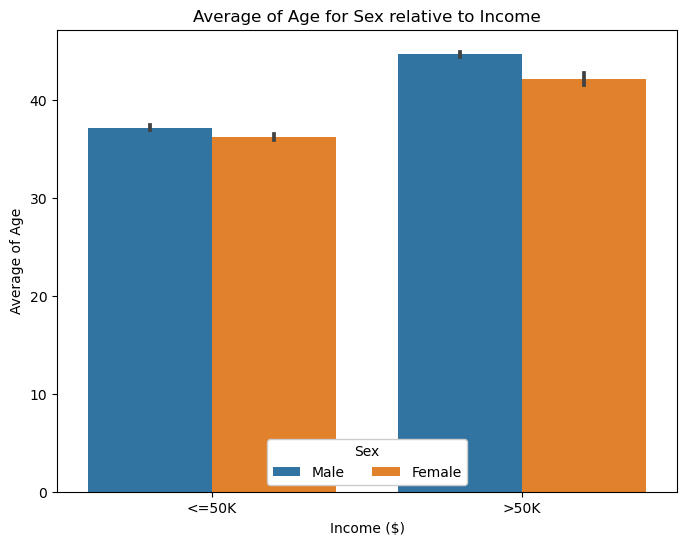

In [25]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

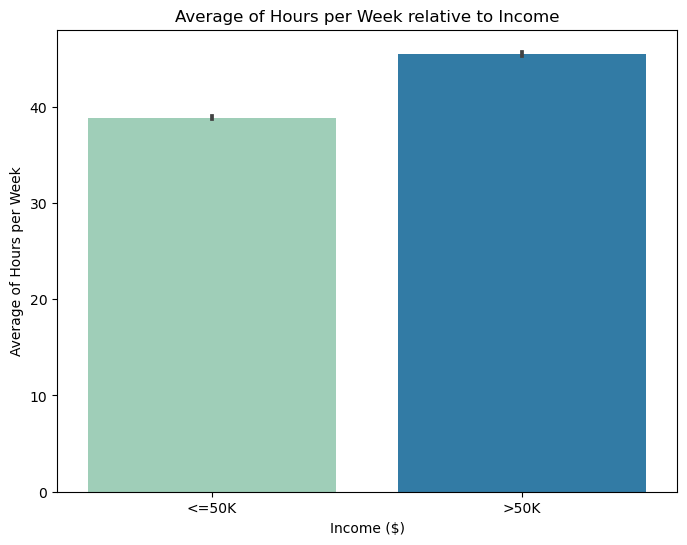

In [26]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=df, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

The bar output shows that the income grows directly with the average of work hours per week. This is reasonable and logical.

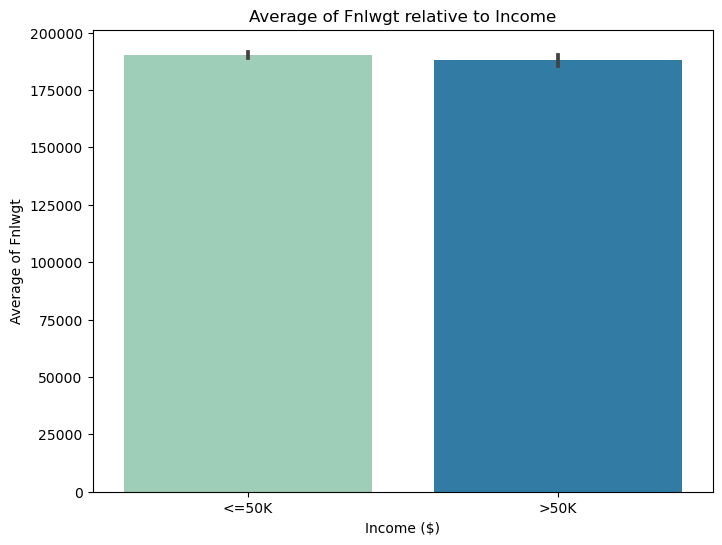

In [27]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=df, x='Income', y='Fnlwgt', palette='YlGnBu')
plt.title('Average of Fnlwgt relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Fnlwgt');

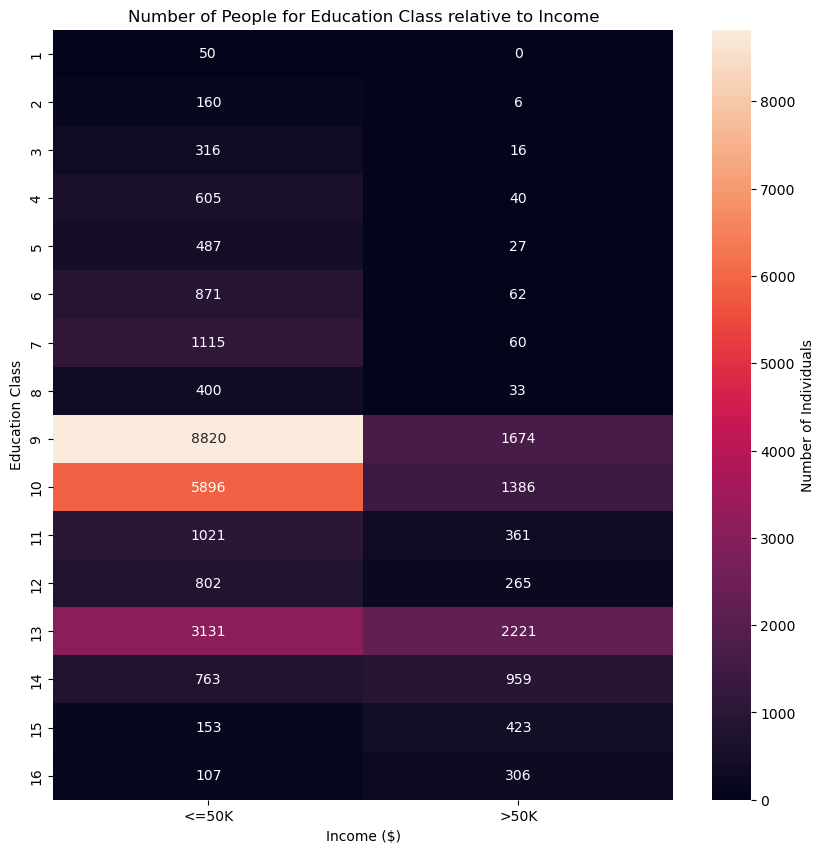

In [28]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = df.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

1. The graph indicates that people with Education classes of 9 & 10 make up the highest in the dataset.
2. its noticed that people with Education class of 14 to 16 proportionally usually make Income that is >50k.
3. Lesser education classes usually make <=50k as income.

# Data Preprocessing


In [29]:
# A copy of the dataset is required so as to maintain the cleaned one for later uses.
# The copied one will be used for preparing the data for the model.
df2 = df.copy()

In [30]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = MinMaxScaler()
df2[numerical] = scaler.fit_transform(df2[numerical])
df2.sample(5)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
29484,0.178082,Self-emp-not-inc,0.405797,11,Never-married,Craft-repair,Not-in-family,White,Male,0.0000,0.00000,0.397959,United-States,<=50K
31012,0.452055,Private,0.119222,14,Divorced,Exec-managerial,Not-in-family,White,Male,0.0000,0.00000,0.622449,United-States,>50K
16619,0.246575,Private,0.179207,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0.0465,0.00000,0.397959,United-States,<=50K
15524,0.123288,Private,0.047514,13,Never-married,Exec-managerial,Not-in-family,White,Male,0.0000,0.43067,0.377551,United-States,<=50K
4138,0.164384,Private,0.131496,9,Never-married,Other-service,Own-child,White,Male,0.0000,0.00000,0.397959,United-States,<=50K


The data has been scaled to MinMaxScalling for numerical features.
This would help to make the data well-prepared for the model.

In [31]:
# Encoding
df2['Sex'] = df2.Sex.replace({"Female": 0, "Male": 1})
df2['Income'] = df2.Income.replace({"<=50K": 0, ">50K": 1})

In [32]:
# Create dummy variables for others
df2 = pd.get_dummies(df2)
encoded = list(df2.columns)
print("{} total features after hot-encoding.".format(len(encoded)))

92 total features after hot-encoding.


Comments:
1. Categorical varaibles have been encoded and dummy variables created using the hot-encoding approach
2. This makes them numerical data aids easier processing and more numerical representation.

# Experimental Process

1. Independent variables for the project are as follows:
Age
Workclass
Fnlwgt
Education_num
Marital_status
Occupation
Relationship
Race
Sex
Capital_gain
Capital_loss
Hours_per_week
Native_country

2. Dependent/Target variable:
Income 

In [33]:
# Create data into x and y
X = df2.drop('Income', axis=1)
y = df2['Income']

In [34]:
# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [ ]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['K-Nearest Neighbors '] =  KNeighborsClassifier()
models['Support Vector Machines'] = SVC()

In [ ]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8499508161691931 | test:  0.8493055089176812
F1-score: train:  0.6554860381298441 | test:  0.6546627238102243
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999538975757808 | test:  0.8560979009036555
F1-score: train:  0.9999043138485426 | test:  0.6758581731848066
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.861115379558884 | test:  0.8602165848720997
F1-score: train:  0.681746966054651 | test:  0.679097227079003
---------------------------------------------------------
K-Nearest Neighbors :
Accuracy: train:  0.8744083441042338 | test:  0.8244407020797139
F1-score: train:  0.7238880138174986 | test:  0.6141416299036008
---------------------------------------------------------


From the exploration of the dataset there seems to be an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

# Features Importance 

In [50]:
from sklearn.preprocessing import LabelEncoder
df_conc = df.copy()
for col in df_conc.columns:
    if df_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_conc[col] = encoder.fit_transform(df_conc[col])

In [51]:
# Partioning the data
Xc = df_conc.drop('Income', axis=1)
yc = df_conc['Income']

In [52]:
# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)

RandomForestClassifier()

In [53]:
# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,Age,14.528639
1,Workclass,4.015355
2,Fnlwgt,16.978187
3,Education_num,11.827075
4,Marital_status,7.611620
5,Occupation,6.685861
6,Relationship,9.742834
7,Race,1.368600
8,Sex,1.178560
9,Capital_gain,12.075769


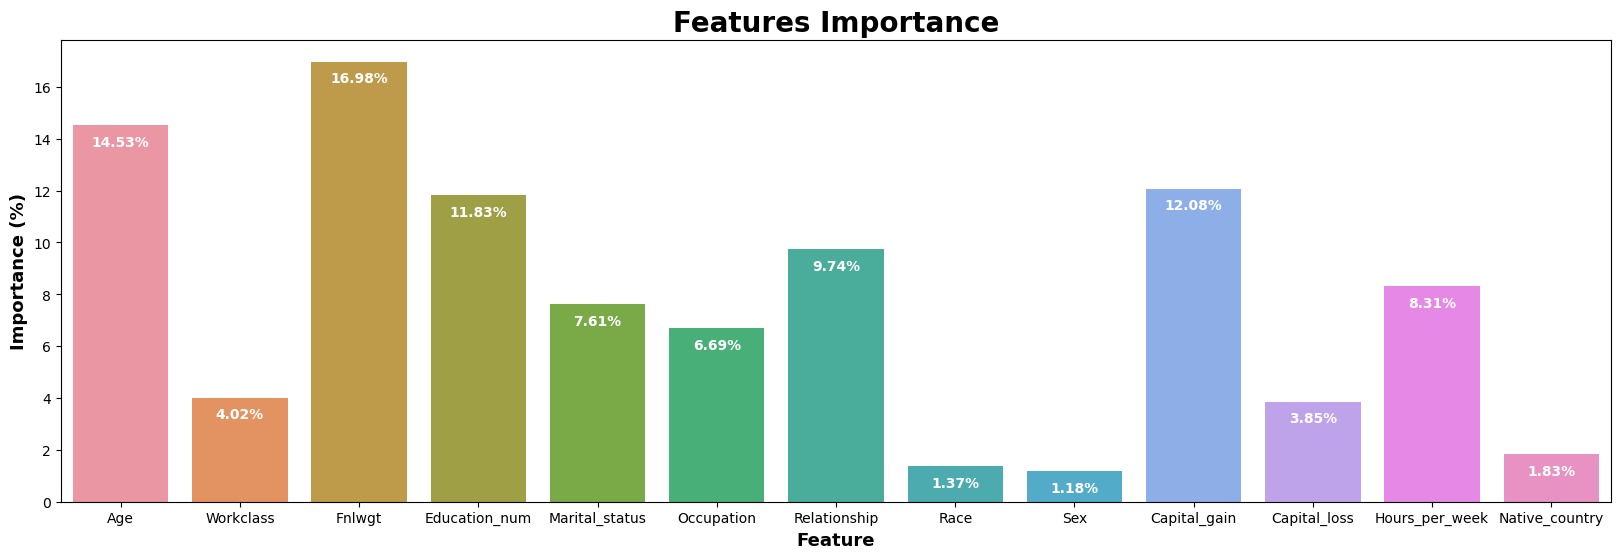

In [56]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);

# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

# Feature selection

We need to drop the features that have less than 4% importance, to speed up the process of fitting the model. Since without them, it would provide the same results of the evaluation.

In [64]:
df_final = df.copy()
df_final.head(2)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [65]:
#dropping features of less than 4% importance
df_final.drop(['Race', 'Sex', 'Capital_loss', 'Native_country'], axis=1, inplace=True)

In [66]:
# Scalling
numerical = ['Age', 'Capital_gain', 'Hours_per_week', 'Fnlwgt']
scaler = MinMaxScaler()
df_final[numerical] = scaler.fit_transform(df_final[numerical])

In [67]:
# Encoding
df_final['Income'] = df_final.Income.replace({"<=50K": 0, ">50K": 1})

In [70]:
# Create dummy variables
df_final = pd.get_dummies(df_final)

In [71]:
# Partioning
Xf = df_final.drop('Income', axis=1)
yf = df_final['Income']

In [72]:
# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)
clf = RandomForestClassifier()

In [73]:
results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999797547797666 | test:  0.9313682478418096
F1-score: train:  0.999979755292064 | test:  0.9348706526693261


# Conclusion